### HW4 - Answer Key
#### *For each question, there may be several approaches. This answer key only serves to provide one of the many solutions.*

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

Table of Contents:
* [Qestion 1](#bullet1) 
* [Qestion 2](#bullet2) 
* [Qestion 3](#bullet3) 
* [Qestion 4](#bullet4) 
* [Qestion 5](#bullet5) 
* [Qestion 6](#bullet6) 
* [Qestion 7](#bullet7)
* [Qestion 8](#bullet8)

##### 1. Import the data as a pd.DataFrame object. Use one or more functions from the pandas library to split the data into three unique datasets. The first should include columns that are factors only (i.e. - categorical data), the second should include columns that are numeric only, and the third should include columns with logical values only. <a class="anchor" id="bullet1"></a>

Hint: Remember that data frames can be thought of as a collection of lists/arrays/pd.Series objects saved in different columns. So think of each column in your data-frame as a pd.Series and split based on column type. Note that pandas has a dtype called "object", which it uses when it cannot determine the datatype. Generally, pandas will save string variables as object data types. For this question, treat the object as a categorical factor.

In [6]:
# Import the data
hp_df = pd.read_csv(r'C:\Users\nicho\OneDrive\Desktop\MDS\QMSS-GR5072-Spring2025-HWs\homework-4-main\Data\Housing_prices_data.csv')
hp_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [8]:
# Split dataframe into 3 new datasets by type (factors, numeric, logical)
df_fact = hp_df.select_dtypes(include=object)
df_num = hp_df.select_dtypes(include=np.number)
df_bool = hp_df.select_dtypes(include='bool')

In [10]:
df_fact

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [12]:
df_num

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [14]:
df_bool

,CentralAir
0,True
1,True
2,True
3,True
4,True
...,...
1455,True
1456,True
1457,True
1458,True


##### 2. Using the second dataset from question #1, for each numeric variable use the apply function to return the mean, median and standard deviation (SD) of all numeric variables. <a class="anchor" id="bullet2"></a>

In [17]:
df_num.apply([np.mean, np.median, np.std])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
median,730.500000,50.000000,NaN,9478.500000,6.000000,5.000000,1973.000000,1994.000000,NaN,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
std,421.465598,42.286082,24.274639,9977.846105,1.382523,1.112418,30.192559,20.638335,181.003845,455.941866,...,125.295863,66.233333,61.098214,29.307289,55.738317,40.163545,495.953090,2.702700,1.327640,79415.291886


##### 3. Using the second dataset from question #1, create a new dataset that only includes the variable indicating sales price ("SalePrice"). Search for a categorical variable which has between 2-4 categories in the full dataset that you think may be related to the sales price of houses. Give the mean, median and SD for SalePrice based on the different groups of the categorical variables. Does the average price seem to vary by the different levels of the categorical factor you chose? <a class="anchor" id="bullet3"></a>

In [28]:
# Create new Sale Price dataset
sp_df = df_num.loc[:, df_num.columns == 'SalePrice'].copy()

# Select categorical variable of interest and confirm no. of categories - LotShape
print(df_fact.ExterQual.unique()) # 4 categories!

# Add lot shape to new dataframe
sp_df['ExterQual'] = df_fact.loc[:, df_fact.columns == 'ExterQual'].copy()

# Make lot shape categorical
sp_df['ExterQual'] = sp_df['ExterQual'].astype('category')

# Group by lot shape and get summary statistics
sp_df_grp = sp_df.groupby('ExterQual')
sp_df_grp.agg([np.mean, np.median, np.std]).round(2)

['Gd' 'TA' 'Ex' 'Fa']


C:\Users\nicho\AppData\Local\Temp\ipykernel_12340\3502357173.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sp_df_grp = sp_df.groupby('ExterQual')
C:\Users\nicho\AppData\Local\Temp\ipykernel_12340\3502357173.py:15: FutureWarning: The provided callable <function mean at 0x0000016FEA11CF40> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  sp_df_grp.agg([np.mean, np.median, np.std]).round(2)
C:\Users\nicho\AppData\Local\Temp\ipykernel_12340\3502357173.py:15: FutureWarning: The provided callable <function median at 0x0000016FEA2AFBA0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavio

SalePrice                     
                mean    median        std
ExterQual                                
Ex         367360.96  364606.5  116401.26
Fa          87985.21   82250.0   39826.92
Gd         231633.51  220000.0   71188.87
TA         144341.31  139450.0   42471.82

ExterQual: Exterior material quality

* Ex: Excellent
* Fa: Fair
* Gd: Good
* TA: Typical/Average

As we would suspect, houses which have better exterior material quality sell for higher prices. Also, the variance within the excellent group is greater than the variance for the fair or average qualities. This makes sense, prices for high-end properties can vary by 100,000s, so this is not really surprising, while houses on the lower end of quality will be more stable and typically only vary by the 10,000s.

##### 4. Regress "SalePrice" on "LotArea", "OverallQual", "OverallCond" with the statsmodels library. Use the syntax below to replicate the output shown you are able to estimate this regression model.

In [34]:
# Specify DVs and IVs
x = df_num[['LotArea', 'OverallQual', 'OverallCond']]
y = df_num['SalePrice']
x = sm.add_constant(x)

# Fit linear regression model
model = sm.OLS(y, x).fit()

# View model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     935.9
Date:                Mon, 10 Mar 2025   Prob (F-statistic):               0.00
Time:                        21:21:59   Log-Likelihood:                -17760.
No. Observations:                1460   AIC:                         3.553e+04
Df Residuals:                    1456   BIC:                         3.555e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.022e+05   8633.073    -11.832      

##### 5. Write a for loop that loops through each level of the categorical factor you chose in Q3, where each iteration of the for loop subsets your data for one group of the categorical variable at a time, and then fits the same regression model specified above in Q4 k times, where k refers to the number of unique categories. On each iteration of your for loop, store the model.summary() information as a new element in a list object. Once your for loop is done running, print the list. There should be k regressions which you estimated. Does the effect of LotArea on SalePrice vary within the different levels of the categorical factor you chose? What is another, more common way to answer a question like this (i.e., a question about moderation or effect heterogeneity)? Hint: Don't forget to account for the standard error when comparing the regression slopes!

In [38]:
# Using a list to store the models
# Create new dataset including x, y, and categorical variable from Q3
mod_df = hp_df.loc[:, ['SalePrice','ExterQual','LotArea','OverallQual','OverallCond']]

# Initialize model list
mod_list = []

# Write for loop to iterate over categories using unique values
for cat in mod_df['ExterQual'].unique():
    
    # Group the data
    mod_df_group = mod_df[mod_df['ExterQual']== cat]
    
    # Define x and y
    print(np.unique(mod_df_group['ExterQual'])) # print so we know the group that is the target for each set of results
    x = mod_df_group[['LotArea', 'OverallQual', 'OverallCond']]
    y = mod_df_group['SalePrice']
    x = sm.add_constant(x)
    
    # Run the model
    model = sm.OLS(y, x).fit()
    
    # Add model to the list
    mod_list.append(model.summary())
    
print(mod_list)

['Gd']
['TA']
['Ex']
['Fa']
[<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     183.8
Date:                Mon, 10 Mar 2025   Prob (F-statistic):           1.50e-79
Time:                        21:23:16   Log-Likelihood:                -5958.8
No. Observations:                 488   AIC:                         1.193e+04
Df Residuals:                     484   BIC:                         1.194e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

C:\Users\nicho\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  res = hypotest_fun_out(*samples, **kwds)


**Does the effect of LotArea on SalePrice vary within the different levels of the categorical factor you chose? What is another, more common way to answer a question like this (i.e., a question about moderation or effect heterogeneity)?**

Yes, the effect of LotArea on SalePrice varies within the different levels of exterior quality. Specifically:

* When exterior quality is good, on average an 1 square foot increase in LotArea is associated with a $2.01 increase in SalePrice, holding OverallQual and OverallCond constant. 

* When exterior quality is typical/average, on average an 1 square foot increase in LotArea is associated with a $1.36 increase in SalePrice, holding OverallQual and OverallCond constant. 

* When exterior quality is excellent, on average an 1 square foot increase in LotArea is associated with a $0.90 decrease in SalePrice, holding OverallQual and OverallCond constant. 

* When exterior quality is good, on average an 1 square foot increase in LotArea is associated with a $2.76 increase in SalePrice, holding OverallQual and OverallCond constant. However, this finding is not statistically significant as p-value (0.099) > 0.05. This is somewhat intuitive as the more irregular a property's shape, the less clear it may be that the property is bigger or smaller and the more difficult it may be to measure its true size.

Hence, the average effect of LotArea on SalePrice holding OverallQual and OverallCond varies based on exterior quality. Interestingly, for qualities which are excellent there is actually an inverse association between SalesPrice and LotArea - while the effect of LotArea on price is positive when the quality is good, fair or average. This is an example of **interaction**. A more common way to test for such effects is to add an interaction term(s) to the models to see if there are statistically signifcant interactions.

##### 6. Using the first dataset from question #1, for each categorical variable use a for loop to print a frequency and relative frequency for every variable. To make your output readable, for each variable you should print the following in this order, placing the variable name where you see blanks below. <a class="anchor" id="bullet5"></a>

* "Frequency table for ______ ============"

* Display the frequency table

* Skip a line, and print "Relative frequency table for ______ ============"

* Skip two lines before printing the data for the next categorical variable

This is what your output should look like for the MSZoning variable.

For example, for the MSZonig variable your output should look like this:

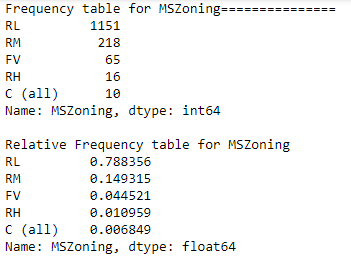

In [44]:
for cat in df_fact:
    freq = df_fact[cat].value_counts()
    rel_freq = df_fact[cat].value_counts(normalize=True)
    print('Frequency table for ' + str(cat) + '============' + '\n' + str(freq) + '\n' +
         '\nRelativeFrequency table for ' + str(cat) + '============' + '\n' + str(rel_freq) + '\n' + '\n')

Frequency table for MSZoning============
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

RelativeFrequency table for MSZoning============
MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: proportion, dtype: float64


Frequency table for Street============
Street
Pave    1454
Grvl       6
Name: count, dtype: int64

RelativeFrequency table for Street============
Street
Pave    0.99589
Grvl    0.00411
Name: proportion, dtype: float64


Frequency table for Alley============
Alley
Grvl    50
Pave    41
Name: count, dtype: int64

RelativeFrequency table for Alley============
Alley
Grvl    0.549451
Pave    0.450549
Name: proportion, dtype: float64


Frequency table for LotShape============
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64

RelativeFrequency table for LotShape============
LotShape
Reg    0.633562
IR1    0.331507
IR2  

##### 7. Do the same thing as number 6, but with a while loop this time. <a class="anchor" id="bullet6"></a>

In [49]:
# Define an iterator, i so that the loop runs while the value of i is less than the number of columns
i = 0
while i < len(df_fact.columns):
    
    # Use iloc since we are dealing with indexes
    freq = df_fact.iloc[:,i].value_counts()
    
    # Use normaliz=True for relative frequencies
    rel_freq = df_fact.iloc[:,i].value_counts(normalize=True)
    print('Frequency table for ' + str(df_fact.columns[i]) + '============' + '\n' + str(freq) + '\n' +
         '\nRelativeFrequency table for ' + str(df_fact.columns[i]) + '============' + '\n' + str(rel_freq) + '\n' + '\n')
    i = i + 1

Frequency table for MSZoning============
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

RelativeFrequency table for MSZoning============
MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: proportion, dtype: float64


Frequency table for Street============
Street
Pave    1454
Grvl       6
Name: count, dtype: int64

RelativeFrequency table for Street============
Street
Pave    0.99589
Grvl    0.00411
Name: proportion, dtype: float64


Frequency table for Alley============
Alley
Grvl    50
Pave    41
Name: count, dtype: int64

RelativeFrequency table for Alley============
Alley
Grvl    0.549451
Pave    0.450549
Name: proportion, dtype: float64


Frequency table for LotShape============
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64

RelativeFrequency table for LotShape============
LotShape
Reg    0.633562
IR1    0.331507
IR2  

##### 8. Using the Rocket class which we created as part of the week 7 class activity, we are going to create a new class called shuttle. The shuttle class should inherit all of Rocket's characteristics but has one additional parameter: flights_completed which measures the number of flights the shuttle has completed. <a class="anchor" id="bullet7"></a>

In [53]:
from math import sqrt

class Rocket():
    # Rocket simulates a rocket ship for a game,
    #  or a physics simulation.
    
    def __init__(self, x=0, y=0):
        # Each rocket has an (x,y) position.
        self.x = x
        self.y = y
        
    def move_rocket(self, x_increment=0, y_increment=1):
        # Move the rocket according to the paremeters given.
        #  Default behavior is to move the rocket up one unit.
        self.x += x_increment
        self.y += y_increment
        
    def get_distance(self, other_rocket):
        # Calculates the distance from this rocket to another rocket,
        #  and returns that value.
        distance = sqrt((self.x-other_rocket.x)**2+(self.y-other_rocket.y)**2)
        return distance
    
class Shuttle(Rocket):
    # Shuttle simulates a space shuttle, which is really
    #  just a reusable rocket.
    
    def __init__(self, x=0, y=0, flights_completed=0):
        super().__init__(x, y)
        self.flights_completed = flights_completed       

In [55]:
shuttle = Shuttle(10,0,3)
print(shuttle)
print("The shuttle is located at ({}, {}), and has recorded {} flights".format(shuttle.x, shuttle.y, shuttle.flights_completed))

The shuttle is located at (10, 0), and has recorded 3 flights


##### 9. Write a single for loop which randomly creates 10 rockets and 10 shuttles using randomly generated integers. Store your output in two separate lists. Once you have your data, use for loops to print the messages you see below. <a class="anchor" id="bullet8"></a>

In [58]:
# Create several shuttles and rockets, with random positions.
#  Shuttles have a random number of flights completed.
from random import randint
shuttles =[]
rockets =[]
for x in range(0,11):
    s_x = randint(0,100)
    s_y = randint(1,100)
    flights_completed = randint(0,10)
    shuttles.append(Shuttle(s_x, s_y, flights_completed))
    
    r_x = randint(0,100)
    r_y = randint(1,100)
    rockets.append(Rocket(r_x, r_y))

In [60]:
# Show the number of flights completed for each shuttle.
for index, shuttle in enumerate(shuttles):
    print("Shuttle {} has completed {} flights.".format(index, shuttle.flights_completed))

Shuttle 0 has completed 9 flights.
Shuttle 1 has completed 10 flights.
Shuttle 2 has completed 7 flights.
Shuttle 3 has completed 7 flights.
Shuttle 4 has completed 10 flights.
Shuttle 5 has completed 6 flights.
Shuttle 6 has completed 8 flights.
Shuttle 7 has completed 5 flights.
Shuttle 8 has completed 10 flights.
Shuttle 9 has completed 5 flights.
Shuttle 10 has completed 1 flights.


In [62]:
 # Show the distance from the first shuttle to all other shuttles.
first_shuttle = shuttles[0]
for index, shuttle in enumerate(shuttles):
    distance = round(first_shuttle.get_distance(shuttle), 2)
    print("The first shuttle is {} units away from shuttle {}.".format(distance, index))

The first shuttle is 0.0 units away from shuttle 0.
The first shuttle is 84.76 units away from shuttle 1.
The first shuttle is 19.31 units away from shuttle 2.
The first shuttle is 6.32 units away from shuttle 3.
The first shuttle is 30.23 units away from shuttle 4.
The first shuttle is 39.62 units away from shuttle 5.
The first shuttle is 81.88 units away from shuttle 6.
The first shuttle is 18.97 units away from shuttle 7.
The first shuttle is 6.4 units away from shuttle 8.
The first shuttle is 33.84 units away from shuttle 9.
The first shuttle is 85.07 units away from shuttle 10.


In [64]:
# Show the distance from the first shuttle to all other rockets.
for index, rocket in enumerate(rockets):
    distance = round(first_shuttle.get_distance(rocket), 2)
    print("The first shuttle is {} units away from rocket {}.".format(distance, index))

The first shuttle is 60.02 units away from rocket 0.
The first shuttle is 12.17 units away from rocket 1.
The first shuttle is 61.62 units away from rocket 2.
The first shuttle is 64.2 units away from rocket 3.
The first shuttle is 46.49 units away from rocket 4.
The first shuttle is 78.64 units away from rocket 5.
The first shuttle is 84.15 units away from rocket 6.
The first shuttle is 42.2 units away from rocket 7.
The first shuttle is 24.52 units away from rocket 8.
The first shuttle is 54.45 units away from rocket 9.
The first shuttle is 65.8 units away from rocket 10.
